# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings # for muting warning messages
# mute warning messages
warnings.filterwarnings('ignore')

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [167]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)
print("Shape of the Dataset")
print(df.shape)
print("Information about the Dataset")
print(df.info())
print("First Few Rows of the Dataset")
print(df.head())
print("Descriptive Statistics of the Dataset")
print(df.describe())

Shape of the Dataset
(150, 5)
Information about the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
First Few Rows of the Dataset
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Descriptive Statistics of the Dataset
       Sepal.Length  Sepal

#### _(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [168]:
print(df.keys())

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')


In [169]:
# Your code here
def alpha_func(D, idx):
    """
    This function calculates an alpha value based on the covariance matrix of Sepal Width and Sepal Length.

    Args:
        D: A pandas DataFrame containing the dataset.
        idx: The index or a list/range of indices of the data point(s) in the DataFrame.

    Returns:
        The calculated alpha value.
    """
    cov_ = np.cov(D[['Sepal.Width', 'Sepal.Length']].loc[idx], rowvar=False)
    return ((cov_[1,1] - cov_[0,1]) /
            (cov_[0,0] + cov_[1,1] - 2*cov_[0,1]))

Test the code below

In [170]:
alpha_func(df, range(100))

0.6189498510165619

#### _(ii)_ Construct a new bootstrap data set and recompute alpha

In [171]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

0.6675354865158225

* Initial alpha value: 0.6189498510165619
* Bootstrap alpha value: 0.6675354865158225

#### Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

#### _(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?
1. Limitations:
````
The mean only tells us the average Sepal Length. It doesn't capture the distribution of Sepal Lengths in the dataset nor does it provide any insight into this variation.
For example, in a shipping context, knowing the average Sepal Length might not be very helpful. We need to consider the range of Sepal Lengths to ensure enough space for all flower sizes.
````
2. Benefits of Bootstrapping:
````
Bootstrapping allows us to see the variability of the mean Sepal Length across different possible samples.
Calculate confidence intervals to show the range within which the true population mean likely falls with a certain level of confidence.
Assess the skewness of the Sepal Length distribution. If the distribution is skewed, the mean might not be the most representative measure of central tendency.
````
#### _(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [172]:
# Add your code here to set the seed
bootstrap_values = []

def boot_SE(D, B=1000, seed=10):
    rng = np.random.default_rng(seed)
    bootstrap_values = []
    n = D.shape[0]
    for i in range(B):
        idx = rng.choice(D.index, n, replace=True)
        value = alpha_func(D, idx)
        bootstrap_values.append(value)
    # Extend return value to capture mean and SD
    mean_alpha = np.mean(bootstrap_values)
    std_alpha = np.std(bootstrap_values, ddof=1)  # ddof=1 for sample standard deviation
    
    return mean_alpha, std_alpha, bootstrap_values

#### _(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [173]:
# Your code here
mean_alpha, std_alpha, boot_se_samples = boot_SE(df, B=1000, seed=10)
print(f"Mean Alpha: {mean_alpha:.4f}")
print(f"Standard Deviation of Alpha: {std_alpha:.4f}")

Mean Alpha: 0.7578
Standard Deviation of Alpha: 0.0299


In [174]:
original_mean_sepal_length = df['Sepal.Length'].mean()
print(f"Original Mean Value of Sepal.Length: {original_mean_sepal_length:.4f}")

Original Mean Value of Sepal.Length: 5.8433


#### _(vi)_ What is the original mean value of `Sepal.Length`?
````
* Original Mean Value of Sepal.Length: 5.8433
````
#### Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

#### _(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.

In [175]:
# Add your code here
t_range = np.ptp(boot_se_samples)

# Print results
print(f"Mean Alpha: {mean_alpha:.4f} - Original Mean: {original_mean_sepal_length:.4f}")
print(f"Standard Deviation of Alpha: {std_alpha:.4f}")
print(f"Range (Peak-to-Peak) of Bootstrap Alpha Values: {t_range:.4f}")

Mean Alpha: 0.7578 - Original Mean: 5.8433
Standard Deviation of Alpha: 0.0299
Range (Peak-to-Peak) of Bootstrap Alpha Values: 0.1900


#### _(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [176]:
# Add your code here
alpha_conf_interval = np.percentile(boot_se_samples, [2.5, 97.5])
print(f"95% Confidence Interval for Alpha: [{alpha_conf_interval[0]:.4f}, {alpha_conf_interval[1]:.4f}]")

95% Confidence Interval for Alpha: [0.6975, 0.8168]


#### _(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?
1. Shape:
````
The histogram have a roughly symmetric, bell-shaped distribution, indicating that the bootstrap alpha values are approximately normally distributed.
````
2. Spread:
````
The alpha values range from about 0.675 to 0.850.
The distribution is centered around the mean alpha value (0.7578), with most values falling between 0.700 and 0.800.
````
3. Mean Line:
````
The red dashed line at the mean alpha value (0.7578) confirms that the distribution is centered around this value.
````
4. Frequency:
````
The highest frequency of alpha values is around 0.750, which matches the mean alpha value.
The distribution has a moderate spread, indicating some variability in the bootstrap alpha values.

The histogram shows that the alpha values derived from the bootstrap samples are reasonably consistent and normally distributed around the mean value of 0.7578. This suggests that the alpha estimate is stable and reliable, with the standard deviation (0.0299) providing a measure of the estimate's precision.````

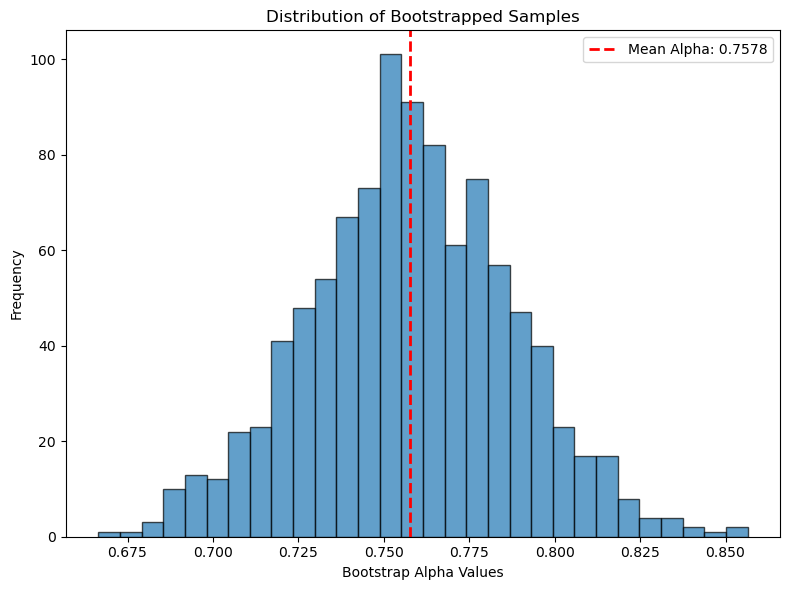

In [177]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the histogram
ax.hist(boot_se_samples, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=mean_alpha, color='red', linestyle='--', linewidth=2, label=f'Mean Alpha: {mean_alpha:.4f}')

# Add a title
ax.set_title('Distribution of Bootstrapped Samples')

# Add a label to the x-axis
ax.set_xlabel('Bootstrap Alpha Values')

# Add a label to the y-axis
ax.set_ylabel('Frequency')

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()

#### _(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

# Write your answer here
1. Average Sepal Length Estimate:
````
* The bootstrapped analysis confirms that the mean sepal length is approximately 5.8433, with a relatively low standard deviation of 0.0299 from the bootstrap samples. This close match between the bootstrap and descriptive statistics indicates a robust and reliable estimate.
* Recommendation: Use the mean sepal length of 5.8433 as the central value for planning space allotment. This estimate is stable and reflects the central tendency of the data accurately.
````
2. Understanding Variability:
````
* The standard deviation of the sepal length is 0.8281, indicating the spread of the data around the mean. The bootstrap analysis further supports this with a standard deviation of 0.0299 for the alpha values.
* Recommendation: Account for the variability by considering the range within one standard deviation of the mean (i.e., 5.8433 ± 0.8281). This range (5.0152 to 6.6714) covers the majority of the sepal lengths and ensures that space allocation accommodates most items.````

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
